# The SIR Model
## Introduction
The SIR model (for Susceptible, Infectious, Recovered) is a model for understanding the evolution of an epidemic. Mathematically, it is a system of differential equations. In this module we will derive the SIR model, analyze it numerically and qualitatively, and play around with many variants of the SIR model.

## Comparment Models
The SIR model is a type of compartment model. Imagine there are three types or 'compartments' of people:
* $S(t)$ denotes the amount of people *susceptible* to a disease at time $t$.
* $I(t)$ denotes the amount of people *infectious* from a disease at time $t$.
* $R(t)$ denotes the amount of people *recovered* from a disease at time $t$.

If $N$ denotes the total number of people in a population then the assumption that all people are one of these three categories implies
$$S(t)+I(t)+R(t)=N.$$

*Note: We presume for now to be constant as a disease passes through a population typically at a much faster timescale than the population signficantly changes*

We will also assume that people change their comparments over time, specifically with Susceptible people getting Infected, and Infected people getting Recovered. We can visualize this in the following diagram, where $a$ and $b$ will be two parameters representing the transitions between states: 

<img src="SIR.png" alt="SIR Diagram" width="150"/>

## Deriving the SIR model 
Now let's consider how people might transition from one compartment to another. How does a person become infected? Well, an infectious person would need to come in contact (exactly what contact means depends on the specifics of the disease) with a susceptible person. We can model the probability of this happening as being proportional to the product $S(t)I(t)$. When contact happens, with some probability, that will mean a Susceptible person transitions to being an Infectious person, so we can use a parameter $a$ giving $aS(t)I(t)$ to represent the transition from Susceptible people to Infectious people.

The transition from Infectious people to Recovered people just means Infectious people are healing over time, and so is proportional to the number of Infectious people. We will thus use $bI(t)$ to represent this transition where $b$ is also a constant. Putting everything together we get the following system of equations

$$S'(t)=-aS(t)I(t)$$
$$I'(t)=aS(t)I(t)-bI(t)$$
$$R'(t)=bI(t)$$

Notice that $S'(t)+I'(t)+R'(t)=0$ which makes sense as we are assuming the total population size doesn't change. This happened because any time we subtracted a term from one population, we added the exact same term to another population. 

We will also assume initial conditions $S(0)=S_0$, $I(0)=I_0$, $R(0)=R_0$.

While this is the base SIR model, more sophisticated models will add extra compartments, extra arrows and complexity, depending on what our model goals are. But let's beginning by analyzing the base SIR model. 



## Plotting the SIR Model
**To execute the code in the next block and view the plot, select the code block and type SHIFT+ENTER or click the triangle button in the top ribbon**. 

The details of the code doesn't matter too much for our immediate purposes, but the core components of the code work like this:
* We implement the SIR model above by defining a function sirsys1 that inputs a time $t$ and the values of S,I,R (for simplicity it does this by inputing a vector $y$ that has three components). It returns the rates of change $S'(t),I'(t),R'(t)$.
* Specific values of a and b are set, as well as initial conditions $y0$ for the number of people in each component, and a time span to consider. Because $y0=(4999,1,0)$ this means a town of 5000 people with a single infectious person. 
* The core math is called **solve_ivp** which is a numerical differential equations solver that is included from the python library scipy. 
* Finally, it uses the library matplotlib to plot the outputs of solve_ivp



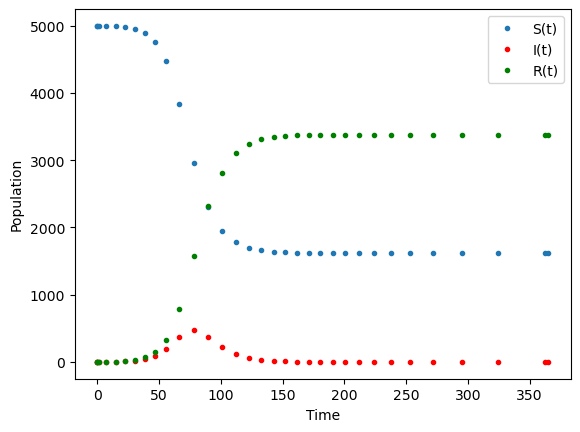

In [1]:
import numpy as np
import matplotlib.pyplot as plt #Matplotlib is used to generate our plots
from scipy.integrate import solve_ivp #We will use solve_ivp to numerically solve the system of differential equations. 

# Define the system of ODEs
def sirsys1(t, y): #y is a vector whose components are Susceptibles, Infected, Recovered respectively
    S, I, R = y
    dS_dt = -a * S * I
    dI_dt = a * S * I - b * I
    dR_dt = b * I
    return [dS_dt, dI_dt, dR_dt]

# Time range and initial conditions
a = 0.00005
b = 0.15
t_span = (0, 365)
y0=[4999,1,0] #Initial conditions for Susceptible, Infectious, Recovered stored as a vector y0. 

# Specify error tolerences, that is how accurately our Initial Value Problem will be solved numerically 
rtol = 1e-4
atol = 1e-4

# Solve the system
sol = solve_ivp(sirsys1, t_span, y0, method='RK45', rtol=rtol, atol=atol)
#Note that "Runge-Kutta 45" is a standard numerical method to solve IVPs with specified absolute and relative error tolerances.

# Plotting the results
plt.plot(sol.t, sol.y[0], '.', label='S(t)')
plt.plot(sol.t, sol.y[1], '.', color='r', label='I(t)')
plt.plot(sol.t, sol.y[2], '.', color='g', label='R(t)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


## Observations
Almost everyone starts Susceptible, but that strictly declines (indeed, S'(t) is always negative, so that makes sense). The number of recovered starts at zero and only increases (indeed, R'(t) is always positive, so that also makes sense). The interesting case is the number of infectious people where $I'(t)$ has both a positive and a negative term. So it increases for a while, until there are not enough susceptible people to keep the disease spreading, and then it declines back down to zero. 

Because this disease stabilized after approximately 200 days, we call this the *asymptotically stable equilibrium*. There is also a trivial equivalibium solution that would happen if $I(0)=0$. 

You might like to play around with differnt values of $a$, $b$ and the time horizon $t_span$ in the above code to see how it affects the plots.

## Let's Modify
Now let's imagine the parameter a changes discretely at various times. For instance, suppose initially a=0.0001, but after 25 days it is decreased to 0.00002 (perhaps a government regulation on social distances is imposed), but then after 45 days a increases back to 0.0001. We can similarly plot each of these three time intervals. The key trick is to set the initial condition for each segement to be the final state of the prior segement 

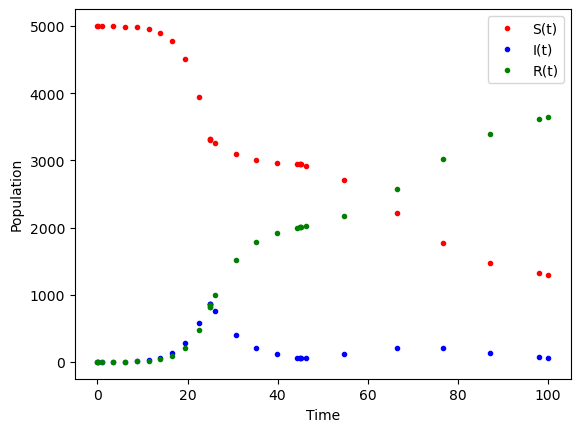

In [2]:
# First segment
a = 0.0001
b = 0.2
y0 = [5000, 1, 0]
sol1 = solve_ivp(sirsys1, [0, 25], y0, method='RK45', rtol=rtol, atol=atol)

# Second segment
a = 0.00002
y0 = [sol1.y[0, -1], sol1.y[1, -1], sol1.y[2, -1]] #Using -1 tells python to use the LAST value in the vector, that is we are setting the initial condition of the 2nd segment to be the final condition of the 1st segment. 
sol2 = solve_ivp(sirsys1, [25, 45], y0, method='RK45', rtol=rtol, atol=atol)

# Third segment
a = 0.0001
y0 = [sol2.y[0, -1], sol2.y[1, -1], sol2.y[2, -1]]
sol3 = solve_ivp(sirsys1, [45, 100], y0, method='RK45', rtol=rtol, atol=atol)

# Plotting the results
plt.plot(sol1.t, sol1.y[0], '.', color='r', label='S(t)')
plt.plot(sol1.t, sol1.y[1], '.', color='b', label='I(t)')
plt.plot(sol1.t, sol1.y[2], '.', color=(0, 0.5, 0), label='R(t)')

plt.plot(sol2.t, sol2.y[0], '.', color='r')
plt.plot(sol2.t, sol2.y[1], '.', color='b')
plt.plot(sol2.t, sol2.y[2], '.', color=(0, 0.5, 0))

plt.plot(sol3.t, sol3.y[0], '.', color='r')
plt.plot(sol3.t, sol3.y[1], '.', color='b')
plt.plot(sol3.t, sol3.y[2], '.', color=(0, 0.5, 0))

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

## Observations
Between time $25$ and $45$, the decreased value of $a$ (for instance suppose a government rule was passed mandating something like social distancing) dramatically slows down the pandemic, and the number of infectious people drops to near 0. However, as $a$ is increased again at time $45$, the pandemic continues again, albiet on a new trajectory than before. 

## Basic Reproduction Number

Ideally a disease doesn't spread through a population. This occurs when $I'(0)<0$, that is the initial rate of infected people is negative. This gives the condition that 

$$I'(0)=aS_0 I_0-bI_0<0\Rightarrow \frac{aS_0}{b}<1$$. 

The quantity $\frac{aS_0}{b}$ is know as the *Basic Reproduction Number* $\mathcal{R}_0$

$\mathcal{R}_0$ depends on three exogenous (which means external to the model) numbers, $a$, $b$, and $S_0$. External factors might influence each of these three numbers
* Policies like social distancing might reduce $a$
* Vaccination rates might lower the number of susceptible people $S_0$ in the population. We could either imagine vaccinated people are Recovered, or we could add a 4th compartment to our model
* While $b$ mostly relies on the medical factors of the disease, you could imagine that quarantining people lowers $b$ as it is in a sense equivalent to having them being Recovered since they can no longer interact with Susceptible people, even if they are medically still infectious. 


## Initial Growth
Our system of differential equations is two hard to solve analytically, this is why we solved it numerically above. However, we can approximate near time $t=0$ where $S(t)\approx S_0$ for small values of $t$ that haven't yet substantially reduced the susceptible population. 
$$I'(t)\approx aS_0I(t)-bI(t)=[aS_0-b]I(t)$$

This is a 1st order, separable ODE, and we can solve it by dividing both sides by $I(t)$ and integrating giving the analytic solution 

$$I(t)=Ce^{(aS_0-b)t}.$$

We can solve for the constant of integration $C$ by evaluating at $t=0$ to give 

$$I(t)=I_0e^{(aS_0-b)t}.$$

This feature is why the beginning of epidemics feel like exponential growth, and indeed for countries around the world this is precisely what we saw for the Covid-19 pandemic until either the variables were changed (such as with social distancing policies reducing the value of $a$) or that enough people had been infected that the susceptible population started dropping meaningfully. 
